In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [9]:
google = web.DataReader('GOOG', data_source='google', start='3/14/2009', end='4/14/2016')
google=google.drop('Volume', axis=1)
google.head()

,Open,High,Low,Close
Date,,,,
2009-03-16,162.83,164.70,159.14,159.69
2009-03-17,159.93,167.50,159.39,167.50
2009-03-18,167.24,169.83,163.86,166.38
2009-03-19,165.67,167.83,163.53,164.81
2009-03-20,164.98,166.33,163.01,164.91


In [10]:
google['Ticks']=range(0, len(google.index.values))
google.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,0
2009-03-17,159.93,167.50,159.39,167.50,1
2009-03-18,167.24,169.83,163.86,166.38,2
2009-03-19,165.67,167.83,163.53,164.81,3
2009-03-20,164.98,166.33,163.01,164.91,4


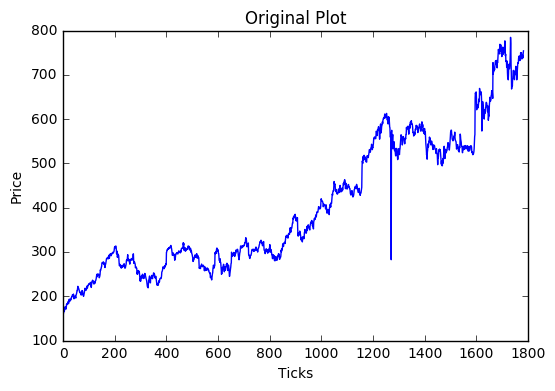

In [11]:
fig=plt.figure(1)
axl=fig.add_subplot(111)
axl.set_xlabel('Ticks')
axl.set_ylabel('Price')
axl.set_title('Original Plot')
axl.plot('Ticks', 'Open', data=google)

In [13]:
one_tenth=google.sample(frac=.1, random_state=np.random.randint(10))
one_tenth.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2015-05-06,531.24,532.38,521.08,524.22,1545
2013-11-07,510.79,511.45,503.32,503.47,1171
2010-05-27,242.19,245.91,240.28,244.98,302
2009-08-18,222.33,223.63,220.94,222.42,108
2012-11-02,347.05,347.43,343.34,343.62,916


In [14]:
one_tenth.index.name=None
one_tenth=one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Open,High,Low,Close,Ticks
2009-05-21,197.95,201.22,196.72,198.05,47
2009-05-22,198.13,199.13,195.80,196.55,48
2009-06-10,217.90,218.73,213.12,216.08,60
2009-07-01,211.89,212.99,208.87,209.29,75
2009-07-13,207.88,212.05,207.38,211.94,82


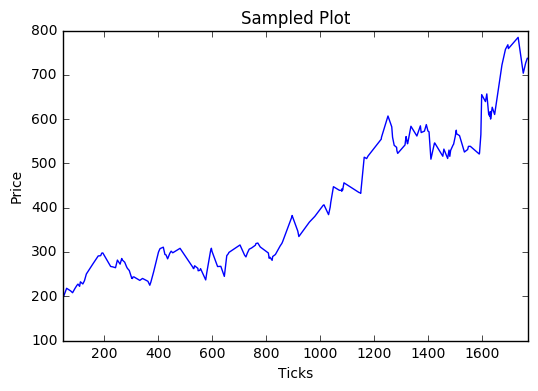

In [15]:
axes=one_tenth.plot('Ticks', 'Open', legend=False, title='Sampled Plot')
axes.legend=None
axes.set_ylabel('Price')

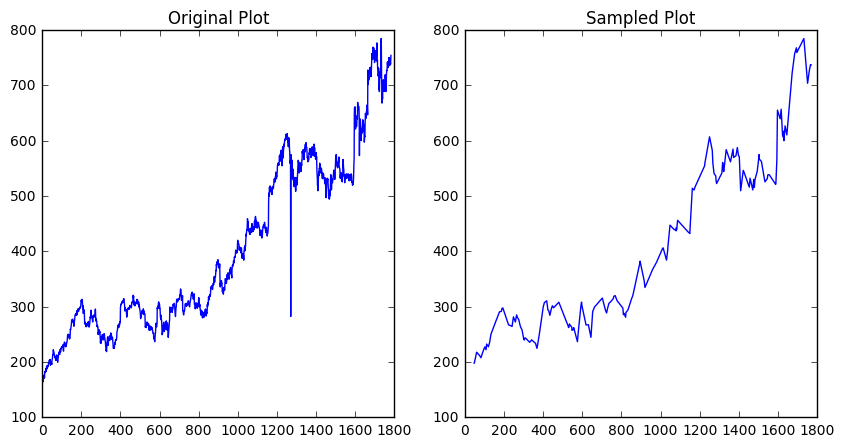

In [16]:
fg, axes=plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot('Ticks', 'Open', data=google)
axes[0].set_title('Original Plot')

axes[1].plot('Ticks', 'Open', data=one_tenth)
axes[1].set_title('Sampled Plot')

In [17]:
google=google.reset_index()
google.head()

,Date,Open,High,Low,Close,Ticks
0,2009-03-16,162.83,164.70,159.14,159.69,0
1,2009-03-17,159.93,167.50,159.39,167.50,1
2,2009-03-18,167.24,169.83,163.86,166.38,2
3,2009-03-19,165.67,167.83,163.53,164.81,3
4,2009-03-20,164.98,166.33,163.01,164.91,4


In [18]:
google['Rolling_Mean']=google.Open.rolling(window=80).mean()
google.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
0,2009-03-16,162.83,164.70,159.14,159.69,0,NaN
1,2009-03-17,159.93,167.50,159.39,167.50,1,NaN
2,2009-03-18,167.24,169.83,163.86,166.38,2,NaN
3,2009-03-19,165.67,167.83,163.53,164.81,3,NaN
4,2009-03-20,164.98,166.33,163.01,164.91,4,NaN


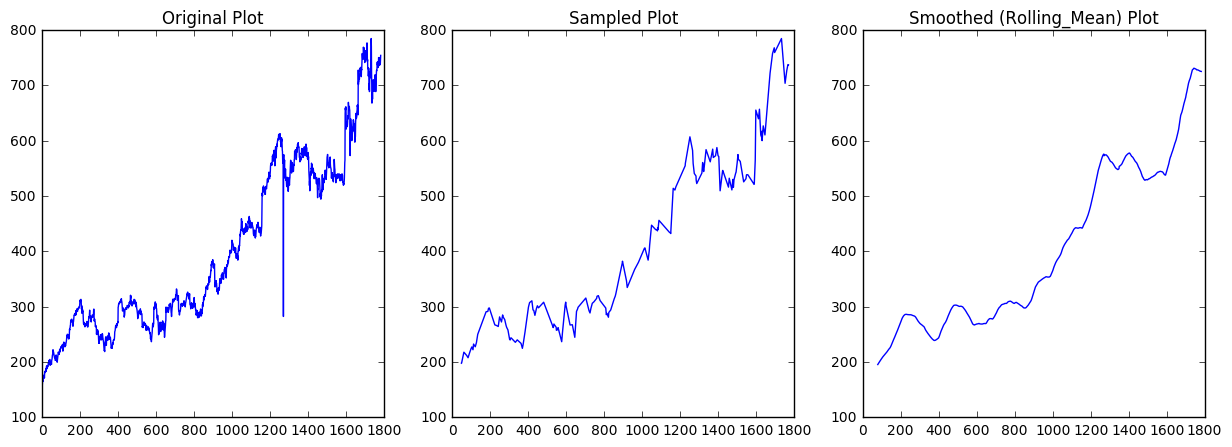

In [22]:
fg, axes=plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes[0].plot('Ticks', 'Open', data=google)
axes[0].set_title('Original Plot')

axes[1].plot('Ticks', 'Open', data=one_tenth)
axes[1].set_title('Sampled Plot')

axes[2].plot('Ticks', 'Rolling_Mean', data=google)
axes[2].set_title('Smoothed (Rolling_Mean) Plot')

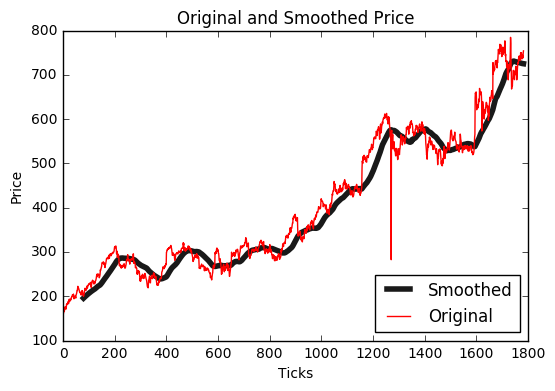

In [24]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(google.Ticks, google.Rolling_Mean, color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed')
ax.plot(google.Ticks, google.Open, color=(1,0,0), linewidth=1, label='Original')
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right')

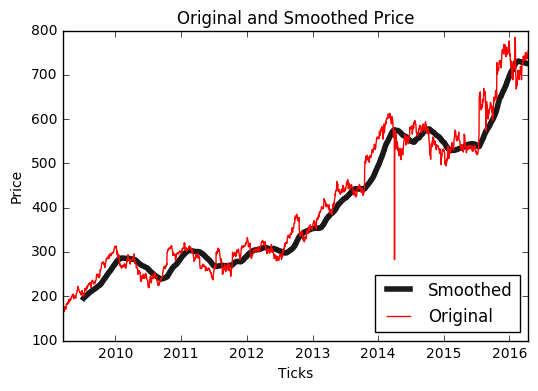

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(google.Date, google.Rolling_Mean, color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed')
ax.plot(google.Date, google.Open, color=(1,0,0), linewidth=1, label='Original')
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right')

In [27]:
google.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Ticks                    int64
Rolling_Mean           float64
dtype: object

In [29]:
filt_google=google[(google.Ticks>=800)&(google.Ticks<=1200)]
filt_google.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
800,2012-05-17,316.60,318.61,310.30,311.21,800,306.568375
801,2012-05-18,312.24,315.89,298.05,299.90,801,306.865500
802,2012-05-21,299.96,307.54,299.70,306.75,802,307.043750
803,2012-05-22,306.41,306.60,297.70,300.10,803,307.310125
804,2012-05-23,300.52,304.50,298.26,304.43,804,307.457375


In [32]:
model=LinearRegression().fit(filt_google[['Ticks']], filt_google[['Rolling_Mean']])
m=model.coef_[0]
b=model.intercept_
print 'y= ', round(m[0], 2), 'x + ', round(b[0], 2)

y=  0.48 x +  -100.16


In [33]:
predictions=model.predict(filt_google[['Ticks']])
predictions[0:5]

array([[ 280.99658148],
       [ 281.47302422],
       [ 281.94946697],
       [ 282.42590971],
       [ 282.90235246]])

In [34]:
predictions=pd.DataFrame(data=predictions, index=filt_google.index.values, columns=['Pred'])
predictions.head()

,Pred
800,280.996581
801,281.473024
802,281.949467
803,282.425910
804,282.902352


In [35]:
joined_df=pd.concat([filt_google, predictions], axis=1)
joined_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean,Pred
800,2012-05-17,316.60,318.61,310.30,311.21,800,306.568375,280.996581
801,2012-05-18,312.24,315.89,298.05,299.90,801,306.865500,281.473024
802,2012-05-21,299.96,307.54,299.70,306.75,802,307.043750,281.949467
803,2012-05-22,306.41,306.60,297.70,300.10,803,307.310125,282.425910
804,2012-05-23,300.52,304.50,298.26,304.43,804,307.457375,282.902352


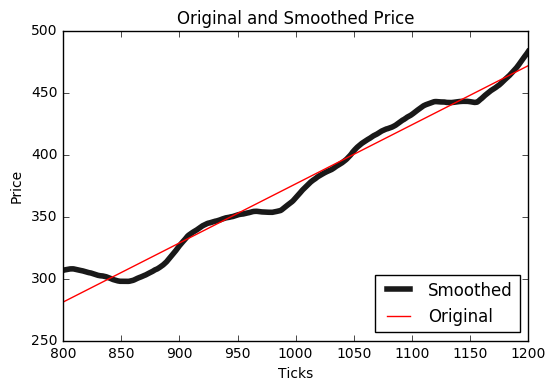

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(joined_df.Ticks, joined_df.Rolling_Mean, color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed')
ax.plot(joined_df.Ticks, joined_df.Pred, color=(1,0,0), linewidth=1, label='Original')
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right')